In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [396]:
df_RNA = pd.read_csv('./data/Tab_delimited_text/Hackathon2024.RNA.txt')
df_RNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36601 entries, 0 to 36600
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [397]:
df_RNA_test = [df_RNA.iloc[36600, 0]][0].split("\t")
print(df_RNA_test)
print(len(df_RNA_test))

['AC007325.2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

In [398]:
df_ATAC = pd.read_csv('./data/Tab_delimited_text/Hackathon2024.ATAC.txt')
df_ATAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108344 entries, 0 to 108343
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [399]:
df_ATAC_test = [df_ATAC.iloc[108343, 0]][0].split("\t")
print(df_ATAC_test.index('1'))
print(len(df_ATAC_test))

316
3000


In [400]:
df_Meta = pd.read_csv('./data/Tab_delimited_text/Hackathon2024.Meta.txt')
df_Meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   nCount_RNA	nCount_ATAC	CellType  2999 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [401]:
df_Meta.columns[0].split("\t")

['nCount_RNA', 'nCount_ATAC', 'CellType']

In [402]:
df_training_peak2gene = pd.read_csv('./data/Tab_delimited_text/Hackathon2024.Training.Set.Peak2Gene.Pairs.txt')
df_training_peak2gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   peak	gene	Pair	Peak2Gene  300 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [442]:
df_testing_peak2gene = pd.read_csv(
    "./data/Tab_delimited_text/Hackathon2024.Testing.Set.Peak2Gene.Pairs.txt"
)
df_testing_peak2gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   peak	gene	Pair	Peak2Gene  300 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [404]:
# Split the columns of the dataframes
df_Meta = df_Meta['nCount_RNA\tnCount_ATAC\tCellType'].str.split("\t", expand=True)
df_Meta.columns = ["ID", "nCount_RNA", "nCount_ATAC", "CellType"]
df_Meta.set_index("ID", inplace=True)
print(df_Meta)


                   nCount_RNA nCount_ATAC   CellType
ID                                                  
AAACCAACACAATGCC-1       5849       16550  CD14 Mono
AAACCAACAGGAACTG-1       5901       25593  CD14 Mono
AAACCAACATAATCCG-1       7975       42743  CD14 Mono
AAACCAACATTGTGCA-1       5525       21760  CD14 Mono
AAACCGCGTACTTCAC-1      10327       76652  CD14 Mono
...                       ...         ...        ...
TTTGTGGCAGCAACCT-1       3820       32487  CD14 Mono
TTTGTGTTCATTGACA-1       3877       24227  CD14 Mono
TTTGTGTTCGTCAAGT-1       6372       23515  CD14 Mono
TTTGTGTTCTCCATAT-1       5803       35205  CD14 Mono
TTTGTTGGTCAGGAAG-1       4690        7797  CD14 Mono

[2999 rows x 3 columns]


In [405]:
# Check for missing values
print("Missing values in df_RNA:", df_RNA.isnull().sum().sum())
print("Missing values in df_ATAC:", df_ATAC.isnull().sum().sum())
print("Missing values in df_Meta:", df_Meta.isnull().sum().sum())

Missing values in df_RNA: 0
Missing values in df_ATAC: 0
Missing values in df_Meta: 0


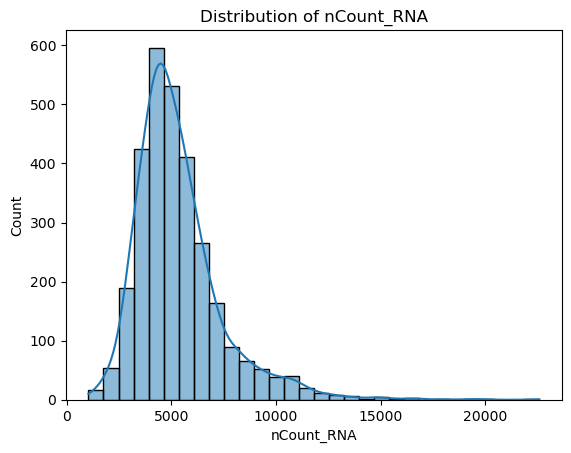

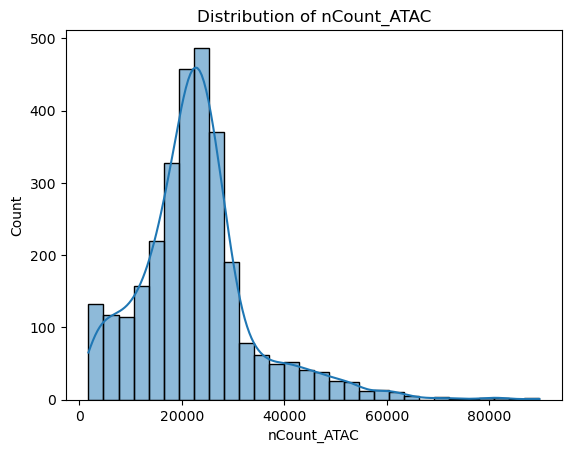

In [406]:
# Convert the data to numeric
df_Meta["nCount_RNA"] = pd.to_numeric(df_Meta["nCount_RNA"])
df_Meta["nCount_ATAC"] = pd.to_numeric(df_Meta["nCount_ATAC"])


# Visualize the distribution of the RNA count data
sns.histplot(df_Meta["nCount_RNA"], bins=30, kde=True)
plt.title("Distribution of nCount_RNA")
plt.show()

# Visualize the distribution of the ATAC count data
sns.histplot(df_Meta["nCount_ATAC"], bins=30, kde=True)
plt.title("Distribution of nCount_ATAC")
plt.show()

In [407]:
# column_name = df_RNA.columns[0].split("\t")

# df_RNA = df_RNA[df_RNA.columns[0]].str.split("\t", expand=True)
# # df_RNA.rename(columns={0: "gene"}, inplace=True)
# # df_RNA.set_index("gene", inplace=True)
# # df_RNA.set_axis(column_name, axis=1, inplace=True)
# df_RNA.set_axis(column_name, axis=1, copy=False)
# print(df_RNA)

In [408]:
column_name = df_RNA.columns[0].split("\t")
df_RNA = df_RNA[df_RNA.columns[0]].str.split("\t", expand=True)
df_RNA.columns = column_name
print(df_RNA)

              gene AAACCAACACAATGCC.1 AAACCAACAGGAACTG.1 AAACCAACATAATCCG.1  \
0      MIR1302-2HG                  0                  0                  0   
1          FAM138A                  0                  0                  0   
2            OR4F5                  0                  0                  0   
3       AL627309.1                  0                  0                  0   
4       AL627309.3                  0                  0                  0   
...            ...                ...                ...                ...   
36596   AC141272.1                  0                  0                  0   
36597   AC023491.2                  0                  0                  0   
36598   AC007325.1                  0                  0                  1   
36599   AC007325.4                  0                  0                  0   
36600   AC007325.2                  0                  0                  0   

      AAACCAACATTGTGCA.1 AAACCGCGTACTTCAC.1 AAACCGG

In [409]:
column_name = df_ATAC.columns[0].split("\t")

df_ATAC = df_ATAC[df_ATAC.columns[0]].str.split("\t", expand=True)
# df_ATAC.rename(columns={0: "peak"}, inplace=True)
# df_ATAC.set_index("peak", inplace=True)
# df_ATAC.set_axis(column_name, axis=1, inplace=True)
# df_ATAC.set_axis(column_name, axis=1)
df_ATAC.columns = column_name

print(df_ATAC)

                            peak AAACCAACACAATGCC.1 AAACCAACAGGAACTG.1  \
0               chr1-10109-10357                  0                  0   
1             chr1-180730-181630                  0                  0   
2             chr1-191491-191736                  0                  0   
3             chr1-267816-268196                  0                  2   
4             chr1-586028-586373                  0                  0   
...                          ...                ...                ...   
108339  chrX-155997360-155997882                  0                  0   
108340  chrX-156030027-156030149                  0                  0   
108341    chrY-11295678-11295744                  0                  0   
108342    chrY-11332988-11334144                  0                  0   
108343    chrY-56836663-56837005                  0                  0   

       AAACCAACATAATCCG.1 AAACCAACATTGTGCA.1 AAACCGCGTACTTCAC.1  \
0                       0                  0

In [410]:
# # Create a StandardScaler instance
# scaler = StandardScaler()

# # Standardize the data and exclude the first column (gene/peak names)
# df_RNA_scaled = pd.DataFrame(
#     scaler.fit_transform(df_RNA.iloc[:, 1:]), columns=df_RNA.columns[1:]
# )
# df_ATAC_scaled = pd.DataFrame(
#     scaler.fit_transform(df_ATAC.iloc[:, 1:]), columns=df_ATAC.columns[1:]
# )

# # Insert the non-scaled first column (gene/peak names) back to the scaled DataFrame
# df_RNA_scaled.insert(0, df_RNA.columns[0], df_RNA.iloc[:, 0])
# df_ATAC_scaled.insert(0, df_ATAC.columns[0], df_ATAC.iloc[:, 0])


# print(df_RNA_scaled.head())
# print(df_ATAC_scaled.head())

## building the model

In [411]:
column_name = df_training_peak2gene.columns[0].split("\t")

df_training_peak2gene = df_training_peak2gene[df_training_peak2gene.columns[0]].str.split("\t", expand=True)
# df_training_peak2gene.rename(columns={0: "peak"}, inplace=True)
# df_training_peak2gene.set_index("peak", inplace=True)
# df_training_peak2gene.set_axis(column_name, axis=1, inplace=True)
# df_training_peak2gene.set_axis(column_name, axis=1)
# df_training_peak2gene.set_axis(column_name, axis=1)
df_training_peak2gene.columns = column_name

print(df_training_peak2gene)

                         peak      gene                              Pair  \
0      chr1-89196985-89201657      GBP2       chr1-89196985-89201657_GBP2   
1      chr6-33077557-33083333  HLA-DPA1   chr6-33077557-33083333_HLA-DPA1   
2    chr6-137789753-137792920   TNFAIP3  chr6-137789753-137792920_TNFAIP3   
3    chr1-212604203-212626574      ATF3     chr1-212604203-212626574_ATF3   
4      chr2-96541661-96555628    ARID5A     chr2-96541661-96555628_ARID5A   
..                        ...       ...                               ...   
295  chr1-151593645-151594727     SNX27    chr1-151593645-151594727_SNX27   
296   chr14-52692182-52692881     PSMC6     chr14-52692182-52692881_PSMC6   
297   chr19-45527935-45529784      FOSB      chr19-45527935-45529784_FOSB   
298   chr17-32352719-32356100    ZNF207    chr17-32352719-32356100_ZNF207   
299    chr5-77629349-77631531     WDR41      chr5-77629349-77631531_WDR41   

    Peak2Gene  
0        TRUE  
1        TRUE  
2        TRUE  
3        TR

In [412]:
replaced_values = []

# iterate through each peak in df_training_peak2gene
for peak in df_training_peak2gene["peak"]:
    # row = df_ATAC[df_ATAC["peak"] == peak].iloc[:, 1:].values
    row = df_ATAC[df_ATAC["peak"] == peak].iloc[:, 1:]
    row = row.apply(pd.to_numeric, errors='coerce')

    row_values = row.values

    if row.size > 0:
        # replaced_values.append(row.reshape(1, 2999))  # reshape to (1, 2999)
        replaced_values.append(row_values.reshape(1, 2999))


mat_ATAC = np.vstack(replaced_values)


print(mat_ATAC)

[[0 0 0 ... 0 0 0]
 [0 2 2 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 4 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [413]:
mat_ATAC.shape

(300, 2999)

In [414]:
replaced_values = []

# iterate through each peak in df_training_peak2gene
for gene in df_training_peak2gene["gene"]:
    # row = df_RNA[df_RNA["gene"] == gene].iloc[:, 1:].values
    row = df_RNA[df_RNA["gene"] == gene].iloc[:, 1:]
    row = row.apply(pd.to_numeric, errors="coerce")

    row_values = row.values

    if row.size > 0:
        # replaced_values.append(row.reshape(1, 2999))  # reshape the row to (1, 2999)
        replaced_values.append(row_values.reshape(1, 2999)
        )  # reshape the row to (1, 2999)

mat_RNA = np.vstack(replaced_values)


print(mat_RNA)

[[4 0 4 ... 1 6 0]
 [4 0 1 ... 1 4 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 8 6 ... 0 6 5]
 [5 0 2 ... 2 1 0]
 [2 0 0 ... 0 0 0]]


In [415]:
mat_RNA.shape

(300, 2999)

In [416]:
# df_training_peak2gene["peak"] = list(mat_ATAC)
# df_training_peak2gene["gene"] = list(mat_RNA)
df_training_peak2gene["peak"] = [np.array(row).reshape(1, 2999) for row in mat_ATAC]
df_training_peak2gene["gene"] = [np.array(row).reshape(1, 2999) for row in mat_RNA]
df_training_peak2gene.drop('Pair', axis=1, inplace=True)
df_training_peak2gene["Peak2Gene"] = df_training_peak2gene["Peak2Gene"].replace(
    {'TRUE': 1, 'FALSE': 0}
)


print(df_training_peak2gene)

                                                  peak  \
0    [[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 4, 0, 0,...   
1    [[0, 2, 2, 0, 9, 0, 0, 4, 0, 2, 0, 2, 0, 0, 4,...   
2    [[0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 4,...   
3    [[2, 0, 6, 2, 2, 14, 0, 12, 6, 18, 4, 0, 12, 1...   
4    [[0, 0, 4, 0, 12, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2...   
..                                                 ...   
295  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,...   
296  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
297  [[0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
298  [[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
299  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,...   

                                                  gene  Peak2Gene  
0    [[4, 0, 4, 0, 2, 1, 0, 3, 1, 1, 1, 2, 3, 0, 1,...          1  
1    [[4, 0, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 6, 0, 2,...          1  
2    [[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 1, 1,...          1  
3    [[0, 2, 2, 0, 2, 3, 0, 1, 

C:\Users\huyin\AppData\Local\Temp\ipykernel_22576\2572071715.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_training_peak2gene["Peak2Gene"] = df_training_peak2gene["Peak2Gene"].replace(


### Training the model

In [417]:
import tensorflow as tf

peak_data = np.stack(df_training_peak2gene["peak"].apply(np.array))
gene_data = np.stack(df_training_peak2gene["gene"].apply(np.array))

peak_data = np.array([x.flatten() for x in peak_data])
gene_data = np.array([x.flatten() for x in gene_data])

features = np.concatenate([peak_data, gene_data], axis=1)

labels = df_training_peak2gene["Peak2Gene"].values

In [418]:
print(features.shape)

(300, 5998)


In [419]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)


In [420]:
print("Train features:", X_train)
print("Train labels:", y_train)
print("Test features:", X_test)
print("Test labels:", y_test)

Train features: [[0 2 0 ... 0 0 0]
 [0 2 2 ... 0 0 0]
 [0 0 2 ... 0 2 1]
 ...
 [0 0 6 ... 0 2 0]
 [0 4 0 ... 0 0 0]
 [0 4 3 ... 0 4 0]]
Train labels: [0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1]
Test features: [[0 0 0 ... 0 0 0]
 [0 2 0 ... 2 2 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]
Test labels: [0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1]


In [422]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Metric
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split


class MCCMetric(Metric):
    def __init__(self, name="mcc", **kwargs):
        super(MCCMetric, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")
        self.true_negatives = self.add_weight(name="tn", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        true_positives = tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1))
        false_positives = tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 1))
        true_negatives = tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 0))
        false_negatives = tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 0))

        self.true_positives.assign_add(
            tf.reduce_sum(tf.cast(true_positives, self.dtype))
        )
        self.false_positives.assign_add(
            tf.reduce_sum(tf.cast(false_positives, self.dtype))
        )
        self.true_negatives.assign_add(
            tf.reduce_sum(tf.cast(true_negatives, self.dtype))
        )
        self.false_negatives.assign_add(
            tf.reduce_sum(tf.cast(false_negatives, self.dtype))
        )

    def result(self):
        tp = self.true_positives
        fp = self.false_positives
        tn = self.true_negatives
        fn = self.false_negatives
        numerator = tp * tn - fp * fn
        denominator = tf.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        return numerator / (denominator + tf.keras.backend.epsilon())

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.true_negatives.assign(0)
        self.false_negatives.assign(0)

In [435]:
from tensorflow.keras.regularizers import l2


# model = tf.keras.models.Sequential(
#     [
#         tf.keras.layers.Dense(512, input_shape=(5998,), activation="relu"),
#         tf.keras.layers.Dropout(0.5),  # 添加 Dropout 层防止过拟合
#         tf.keras.layers.Dense(256, activation="relu"),
#         tf.keras.layers.Dense(1, activation="sigmoid"),
#     ]
# )


# model = Sequential(
#     [
#         Dense(128, activation="relu", input_shape=(5998,)),
#         Dropout(0.5),
#         Dense(64, activation="relu"),
#         Dense(1, activation="sigmoid"),
#     ]
# )

# model = Sequential(
#     [
#         Dense(
#             256,
#             activation="relu",
#             input_shape=(5998,),
#             kernel_regularizer=tf.keras.regularizers.l2(0.01),
#         ),
#         Dropout(0.5),
#         Dense(
#             128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)
#         ),
#         Dropout(0.5),
#         Dense(64, activation="relu"),
#         Dense(1, activation="sigmoid"),
#     ]
# )

model = Sequential(
    [
        Dense(
            512, activation="relu", input_shape=(5998,), kernel_regularizer=l2(0.001)
        ),
        Dropout(0.5),
        Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

In [436]:
# Compile the model
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", MCCMetric()]
)

In [437]:
# Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# history = model.fit(
#     X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)
# )

# history = model.fit(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(X_test, y_test),
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor="val_mcc", patience=3, mode="max", restore_best_weights=True
#         )
#     ],
# )

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_mcc", patience=5, mode="max", restore_best_weights=True
        )
    ],
)

Epoch 1/20
8/8 [==============================] - 1s 54ms/step - loss: 4.4165 - accuracy: 0.4583 - mcc: -0.1004 - val_loss: 2.1888 - val_accuracy: 0.5000 - val_mcc: 0.1259
Epoch 2/20
8/8 [==============================] - 0s 15ms/step - loss: 4.4554 - accuracy: 0.5125 - mcc: 0.0238 - val_loss: 2.1843 - val_accuracy: 0.4833 - val_mcc: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 0s 15ms/step - loss: 4.4391 - accuracy: 0.5000 - mcc: -0.0051 - val_loss: 2.1666 - val_accuracy: 0.5667 - val_mcc: 0.2195
Epoch 4/20
8/8 [==============================] - 0s 14ms/step - loss: 4.1551 - accuracy: 0.4875 - mcc: -0.0337 - val_loss: 2.1760 - val_accuracy: 0.4833 - val_mcc: 0.0000e+00
Epoch 5/20
8/8 [==============================] - 0s 15ms/step - loss: 4.4360 - accuracy: 0.5000 - mcc: -0.0056 - val_loss: 2.1443 - val_accuracy: 0.5167 - val_mcc: 0.1796
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 3.6511 - accuracy: 0.5167 - mcc: 0.0329 - val_loss: 2.1770 - v

In [438]:
evaluation = model.evaluate(X_test, y_test)
print(
    f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}, Test MCC: {evaluation[2]}"
)

2/2 [==============================] - 0s 13ms/step - loss: 1.9577 - accuracy: 0.6167 - mcc: 0.2464
Test Loss: 1.957718014717102, Test Accuracy: 0.6166666746139526, Test MCC: 0.24637117981910706


In [443]:
column_name = df_testing_peak2gene.columns[0].split("\t")
df_testing_peak2gene = df_testing_peak2gene[
    df_testing_peak2gene.columns[0]
].str.split("\t", expand=True)

df_testing_peak2gene.columns = column_name

print(df_testing_peak2gene)

                        peak    gene                           Pair Peak2Gene
0       chr1-1245493-1248050    SDF4      chr1-1245493-1248050_SDF4         ?
1       chr1-1330394-1334148  MRPL20    chr1-1330394-1334148_MRPL20         ?
2       chr1-2145904-2147150  FAAP20    chr1-2145904-2147150_FAAP20         ?
3       chr1-9713011-9736481  PIK3CD    chr1-9713011-9736481_PIK3CD         ?
4     chr1-21287896-21301043    ECE1    chr1-21287896-21301043_ECE1         ?
..                       ...     ...                            ...       ...
295  chr22-39513720-39514799    ATF4   chr22-39513720-39514799_ATF4         ?
296  chr22-39898750-39899616   GRAP2  chr22-39898750-39899616_GRAP2         ?
297  chr22-40863752-40864675    ST13   chr22-40863752-40864675_ST13         ?
298  chr22-44204897-44207872   PARVG  chr22-44204897-44207872_PARVG         ?
299  chr22-50599877-50602115    CHKB   chr22-50599877-50602115_CHKB         ?

[300 rows x 4 columns]


In [444]:
testing_peak = df_testing_peak2gene["peak"]
testing_gene = df_testing_peak2gene["gene"]

print(testing_peak)
print(testing_gene)

0         chr1-1245493-1248050
1         chr1-1330394-1334148
2         chr1-2145904-2147150
3         chr1-9713011-9736481
4       chr1-21287896-21301043
                ...           
295    chr22-39513720-39514799
296    chr22-39898750-39899616
297    chr22-40863752-40864675
298    chr22-44204897-44207872
299    chr22-50599877-50602115
Name: peak, Length: 300, dtype: object
0        SDF4
1      MRPL20
2      FAAP20
3      PIK3CD
4        ECE1
        ...  
295      ATF4
296     GRAP2
297      ST13
298     PARVG
299      CHKB
Name: gene, Length: 300, dtype: object


In [445]:
replaced_values = []

# iterate through each peak in df_testing_peak2gene
for peak in df_testing_peak2gene["peak"]:
    # row = df_ATAC[df_ATAC["peak"] == peak].iloc[:, 1:].values
    row = df_ATAC[df_ATAC["peak"] == peak].iloc[:, 1:]
    row = row.apply(pd.to_numeric, errors="coerce")

    row_values = row.values

    if row.size > 0:
        # replaced_values.append(row.reshape(1, 2999))  # reshape to (1, 2999)
        replaced_values.append(row_values.reshape(1, 2999))


mat_ATAC = np.vstack(replaced_values)


print(mat_ATAC)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 2 ... 0 0 0]]


In [446]:
mat_ATAC.shape

(300, 2999)

In [447]:
replaced_values = []

# iterate through each gene in df_testing_peak2gene
for gene in df_testing_peak2gene["gene"]:
    # 找到 df_ATAC 中对应的 peak 的那一行
    # row = df_RNA[df_RNA["gene"] == gene].iloc[:, 1:].values
    row = df_RNA[df_RNA["gene"] == gene].iloc[:, 1:]
    row = row.apply(pd.to_numeric, errors="coerce")

    row_values = row.values

    # check if the corresponding row is found
    if row.size > 0:
        # replaced_values.append(row.reshape(1, 2999))  # reshaping it to (1, 2999)
        replaced_values.append(
            row_values.reshape(1, 2999)
        )  # reshaping it to (1, 2999)

mat_RNA = np.vstack(replaced_values)


print(mat_RNA)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 1 ... 1 1 0]
 [0 0 0 ... 0 5 1]
 [0 0 0 ... 2 1 1]]


In [448]:
mat_RNA.shape

(300, 2999)

In [450]:
df_testing_peak2gene["peak"] = [np.array(row).reshape(1, 2999) for row in mat_ATAC]
df_testing_peak2gene["gene"] = [np.array(row).reshape(1, 2999) for row in mat_RNA]


print(df_testing_peak2gene)

                                                  peak  \
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,...   
1    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,...   
2    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,...   
3    [[2, 2, 8, 2, 8, 0, 0, 0, 2, 4, 10, 0, 4, 0, 4...   
4    [[0, 2, 6, 0, 16, 2, 4, 2, 0, 0, 4, 0, 4, 0, 8...   
..                                                 ...   
295  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...   
296  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
297  [[0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,...   
298  [[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
299  [[0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,...   

                                                  gene  \
0    [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,...   
1    [[0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,...   
2    [[0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,...   
3    [[0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1,...   
4    [[2, 1, 

In [455]:
peak_data_test = np.stack(df_testing_peak2gene["peak"].apply(np.array))
gene_data_test = np.stack(df_testing_peak2gene["gene"].apply(np.array))

peak_data_test = np.array([x.flatten() for x in peak_data_test])
gene_data_test = np.array([x.flatten() for x in gene_data_test])

features_test = np.concatenate([peak_data_test, gene_data_test], axis=1)

In [456]:
print(features_test.shape)

(300, 5998)


In [457]:
y_pred_test = model.predict(features_test)
y_pred_test = (y_pred_test > 0.5).astype(
    int
)  

print(y_pred_test)

10/10 [==============================] - 0s 3ms/step
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [

In [462]:
df_testing_peak2gene["Peak2Gene"] = y_pred_test
df_testing_peak2gene["Peak2Gene"] = df_testing_peak2gene["Peak2Gene"].map(
    {1: "TRUE", 0: "FALSE"}
)

df_testing_peak2gene['peak'] = testing_peak
df_testing_peak2gene['gene'] = testing_gene

print(df_testing_peak2gene)

                        peak    gene                           Pair Peak2Gene
0       chr1-1245493-1248050    SDF4      chr1-1245493-1248050_SDF4     FALSE
1       chr1-1330394-1334148  MRPL20    chr1-1330394-1334148_MRPL20     FALSE
2       chr1-2145904-2147150  FAAP20    chr1-2145904-2147150_FAAP20     FALSE
3       chr1-9713011-9736481  PIK3CD    chr1-9713011-9736481_PIK3CD      TRUE
4     chr1-21287896-21301043    ECE1    chr1-21287896-21301043_ECE1      TRUE
..                       ...     ...                            ...       ...
295  chr22-39513720-39514799    ATF4   chr22-39513720-39514799_ATF4     FALSE
296  chr22-39898750-39899616   GRAP2  chr22-39898750-39899616_GRAP2     FALSE
297  chr22-40863752-40864675    ST13   chr22-40863752-40864675_ST13     FALSE
298  chr22-44204897-44207872   PARVG  chr22-44204897-44207872_PARVG     FALSE
299  chr22-50599877-50602115    CHKB   chr22-50599877-50602115_CHKB     FALSE

[300 rows x 4 columns]


In [463]:
df_testing_peak2gene.to_csv("updated_test_predictions.csv", index=False)